In [15]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from scripts import database as db
from scripts import notebook_utils as nu


In [16]:
connection = db.get_connection()
cursor = connection.cursor()

In [17]:
top_10_sql = '''SELECT basket.product_id, COUNT(basket.product_id)as amount, products.name, products.flavour
FROM basket
INNER JOIN products ON basket.product_id=products.product_id
GROUP BY name, flavour
ORDER BY amount DESC
LIMIT 5'''

In [18]:
cursor.execute(top_10_sql)
data = cursor.fetchall()

In [19]:
top_10 = pd.DataFrame(data)
top_10.columns = ("sku", "amount_sold", "product", "flavour")
top_10["flavour"] = (" + " + top_10["flavour"])
top_10["products_and_flavour"] = top_10["product"] + top_10["flavour"]
top_10 = top_10.drop(["sku","product", "flavour"], axis=1)
top_10["amount_sold"] = top_10["amount_sold"].astype(int)

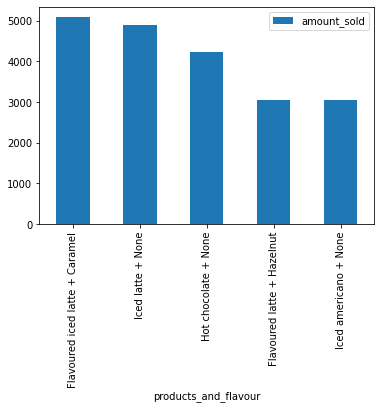

In [20]:
top_10.plot(kind="bar", x="products_and_flavour", y="amount_sold")
plt.show()

In [21]:
bottom_10_sql = '''SELECT basket.product_id, COUNT(basket.product_id)as amount, products.name, products.flavour
FROM basket
INNER JOIN products ON basket.product_id=products.product_id
GROUP BY name, flavour
ORDER BY amount ASC
LIMIT 5'''

In [22]:
cursor.execute(bottom_10_sql)
data = cursor.fetchall()

In [23]:
bottom_10 = pd.DataFrame(data)
bottom_10.columns = ("sku", "amount_sold", "product", "flavour")
bottom_10["flavour"] = (" + " + bottom_10["flavour"])
bottom_10["products_and_flavour"] = bottom_10["product"] + bottom_10["flavour"]
bottom_10 = bottom_10.drop(["sku","product", "flavour"], axis=1)
bottom_10["amount_sold"] = bottom_10["amount_sold"].astype(int)

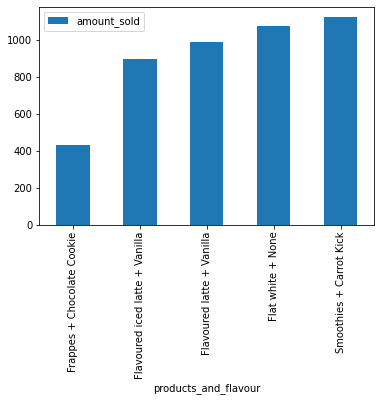

In [24]:
bottom_10.plot(kind="bar", x="products_and_flavour", y="amount_sold")
plt.show()

In [33]:
top_10_sql_store = """SELECT transactions.store_id, transactions.transaction_id, basket.product_id, COUNT(basket.product_id)as amount, products.name, products.flavour 
FROM transactions, basket, products
LEFT JOIN transactions ON transactions.transaction_id=basket.transaction_id
RIGHT JOIN products ON products.product_id=basket.product_id"""


# SELECT basket.product_id, basket.transaction_id, transactions.store_id, COUNT(basket.product_id)as amount, products.name, products.flavour
# FROM basket 
# INNER JOIN products ON basket.product_id=products.product_id
# INNER JOIN transactions ON transactions.transaction_id=basket.transaction_id
# ORDER BY amount DESC
# LIMIT 5

In [34]:
cursor.execute(top_10_sql_store)
data = cursor.fetchall()

OperationalError: (1066, "Not unique table/alias: 'products'")

In [32]:
store_top_5 = pd.DataFrame(data)

In [ ]:
print(store_top_5)